In [0]:
# By Liubov Tovin
# Implement rolling window Linear Regressor to predict next day close price for IBM stock

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
lag5_df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/5minsLagData.csv')
lag15_df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/15minsLagData.csv')
lag30_df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/30minsLagData.csv')

In [10]:
lag5_df[:10]

,Unnamed: 0,DateTime,Open,High,Low,Close,Volume,Polarity,lead
0,0,2016-01-04 09:03:00,112.28,112.28,112.28,112.28,120,0.000000,112.20
1,1,2016-01-04 09:30:00,112.53,112.70,112.28,112.30,134096,0.103571,112.27
2,2,2016-01-04 09:31:00,112.28,112.36,112.15,112.17,20521,0.103571,112.36
3,3,2016-01-04 09:32:00,112.17,112.36,112.17,112.33,20044,0.103571,112.72
4,4,2016-01-04 09:33:00,112.32,112.36,112.12,112.25,21591,0.103571,112.63
5,5,2016-01-04 09:34:00,112.25,112.32,112.12,112.20,17154,0.103571,112.62
6,6,2016-01-04 09:35:00,112.15,112.37,112.15,112.27,28000,0.103571,112.57
7,7,2016-01-04 09:36:00,112.21,112.36,112.18,112.36,19287,0.103571,112.53
8,8,2016-01-04 09:37:00,112.37,112.79,112.36,112.72,33264,0.000000,112.31
9,9,2016-01-04 09:38:00,112.71,112.71,112.53,112.63,27673,0.000000,112.28


In [11]:
lag5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427624 entries, 0 to 427623
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  427624 non-null  int64  
 1   DateTime    427624 non-null  object 
 2   Open        427624 non-null  float64
 3   High        427624 non-null  float64
 4   Low         427624 non-null  float64
 5   Close       427624 non-null  float64
 6   Volume      427624 non-null  int64  
 7   Polarity    427624 non-null  float64
 8   lead        427619 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 29.4+ MB


In [12]:
lag5_df.tail()

,Unnamed: 0,DateTime,Open,High,Low,Close,Volume,Polarity,lead
427619,427619,2020-04-28 15:55:00,125.92,126.26,125.91,126.22,48228,0.0,NaN
427620,427620,2020-04-28 15:56:00,126.22,126.41,126.22,126.41,44881,0.0,NaN
427621,427621,2020-04-28 15:57:00,126.42,126.50,126.35,126.48,44224,0.0,NaN
427622,427622,2020-04-28 15:58:00,126.49,126.60,126.44,126.59,59030,0.0,NaN
427623,427623,2020-04-28 15:59:00,126.59,126.59,126.25,126.25,148971,0.0,NaN


In [0]:
# Drop NaN
lag5_df.dropna(inplace=True)
lag15_df.dropna(inplace=True)
lag30_df.dropna(inplace=True)

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
def train_over_window(w,df):
    N = len(df)
    predictions = []
    true = []
    for t in range(N-w-1):
        X_train = df.loc[t:t+w-1, ['Open','High','Low','Close','Volume']].values.reshape(-1,5)
        y_train = df.loc[t:t+w-1, 'lead'].values  
        
        X_test = df.loc[t+w, ['Open','High','Low','Close','Volume']].values.reshape(-1,5)
        y_test = df.loc[t+w, 'lead']   
        
        lr_w = lr.fit(X_train,y_train)

        true.append(y_test)
        predictions.append(lr_w.predict(X_test))
        
    return predictions, true

In [0]:
y_pred_lag5, y_test_lag5 = train_over_window(100,lag5_df)

In [20]:
y_pred_lag5[:2]

[array([111.76489866]), array([111.78359498])]

In [0]:
import pickle

with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred_lag5.pickle', 'wb') as f:
    pickle.dump(y_pred_lag5, f)
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_test_lag5.pickle', 'wb') as f:
    pickle.dump(y_test_lag5, f)

In [0]:
y_pred_lag15, y_test_lag15 = train_over_window(100,lag15_df)

with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred_lag15.pickle', 'wb') as f:
    pickle.dump(y_pred_lag15, f)
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_test_lag15.pickle', 'wb') as f:
    pickle.dump(y_test_lag15, f)

In [0]:
y_pred_lag30, y_test_lag30 = train_over_window(100,lag30_df)

with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred_lag30.pickle', 'wb') as f:
    pickle.dump(y_pred_lag30, f)
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_test_lag30.pickle', 'wb') as f:
    pickle.dump(y_test_lag30, f)

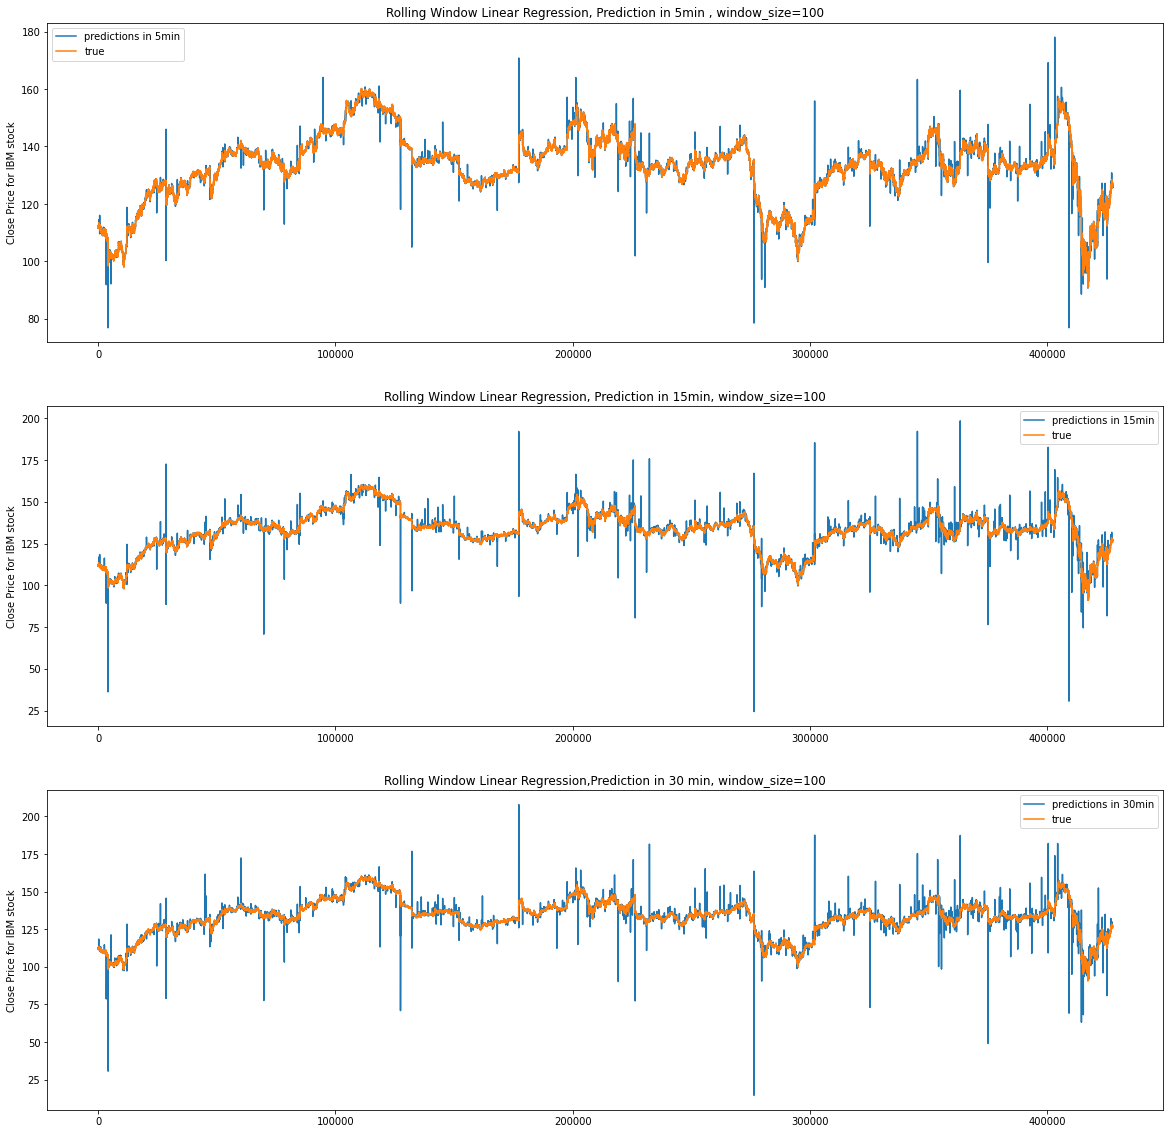

In [32]:
y_hat_lag5 = np.asarray(y_pred_lag5).reshape(-1)
y_hat_lag15 = np.asarray(y_pred_lag15).reshape(-1)
y_hat_lag30 = np.asarray(y_pred_lag30).reshape(-1)

fig, ax = plt.subplots(3,1, figsize=(20,20))

ax[0].plot(y_hat_lag5, label='predictions in 5min')
ax[0].plot(y_test_lag5, label='true')

ax[1].plot(y_hat_lag15, label='predictions in 15min')
ax[1].plot(y_test_lag15, label='true')

ax[2].plot(y_hat_lag30, label='predictions in 30min')
ax[2].plot(y_test_lag30, label='true')

ax[0].set_title('Rolling Window Linear Regression, Prediction in 5min , window_size=100')
ax[0].set_ylabel('Close Price for IBM stock')
ax[0].legend()

ax[1].set_title('Rolling Window Linear Regression, Prediction in 15min, window_size=100')
ax[1].set_ylabel('Close Price for IBM stock')
ax[1].legend()

ax[2].set_title('Rolling Window Linear Regression,Prediction in 30 min, window_size=100')
ax[2].set_ylabel('Close Price for IBM stock')
ax[2].legend()

plt.show()

In [34]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

mse_lag5 = mean_squared_error(y_test_lag5, y_hat_lag5, squared=True)
rmse_lag5 = mean_squared_error(y_test_lag5, y_hat_lag5, squared=False)
print('Mean Squared Error 5min prediction = ',mse_lag5)
print('Root Mean Squares Error 5min prediction = ', rmse_lag5)

mse_lag15 = mean_squared_error(y_test_lag15, y_hat_lag15, squared=True)
rmse_lag15 = mean_squared_error(y_test_lag15, y_hat_lag15, squared=False)
print('Mean Squared Error 15min prediction = ',mse_lag15)
print('Root Mean Squares Error 15min predicion = ', rmse_lag15)

mse_lag30 = mean_squared_error(y_test_lag30, y_hat_lag30, squared=True)
rmse_lag30 = mean_squared_error(y_test_lag30, y_hat_lag30, squared=False)
print('Mean Squared Error 30min prediction = ',mse_lag30)
print('Root Mean Squares Error 5min predicoin = ', rmse_lag30)

Mean Squared Error 5min prediction =  0.11916635066463159
Root Mean Squares Error 5min prediction =  0.34520479525150227
Mean Squared Error 15min prediction =  0.3741823667524324
Root Mean Squares Error 15min predicion =  0.6117044766490044
Mean Squared Error 30min prediction =  0.49815844515922514
Root Mean Squares Error 5min predicoin =  0.7058034040433817


In [0]:
# Now, add new's sentiment polarity to the features
def train_over_window_polarity(w,df):
    N = len(df)
    predictions = []
    true = []
    for t in range(N-w-1):
        X_train = df.loc[t:t+w-1, ['Open','High','Low','Close','Volume','Polarity']].values.reshape(-1,6)
        y_train = df.loc[t:t+w-1, 'lead'].values  
        
        X_test = df.loc[t+w, ['Open','High','Low','Close','Volume','Polarity']].values.reshape(-1,6)
        y_test = df.loc[t+w, 'lead']   
        
        lr_w = lr.fit(X_train,y_train)

        true.append(y_test)
        predictions.append(lr_w.predict(X_test))
        
    return predictions, true

In [0]:
y_pred_polarity_lag5, _ = train_over_window_polarity(100,lag5_df)
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred_polarity_lag5.pickle', 'wb') as f:
    pickle.dump(y_pred_polarity_lag5, f)

In [0]:
y_pred_polarity_lag15, _ = train_over_window_polarity(100,lag15_df)
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred_polarity_lag15.pickle', 'wb') as f:
    pickle.dump(y_pred_polarity_lag15, f)

In [0]:
y_pred_polarity_lag30, _ = train_over_window_polarity(100,lag30_df)
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred_polarity_lag30.pickle', 'wb') as f:
    pickle.dump(y_pred_polarity_lag30, f)

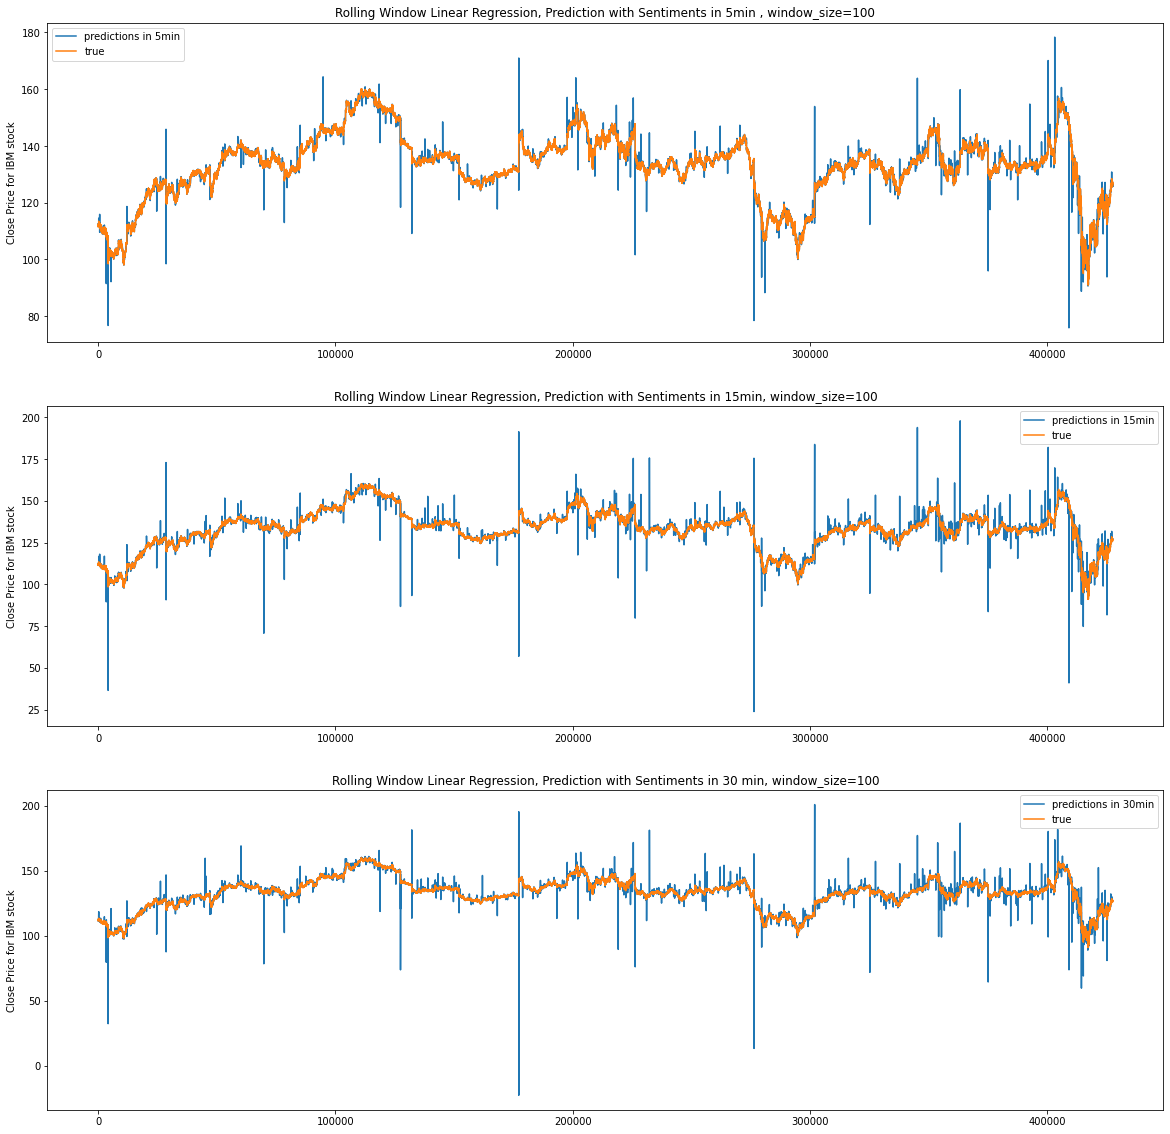

In [39]:
y_hat_polarity_lag5 = np.asarray(y_pred_polarity_lag5).reshape(-1)
y_hat_polarity_lag15 = np.asarray(y_pred_polarity_lag15).reshape(-1)
y_hat_polarity_lag30 = np.asarray(y_pred_polarity_lag30).reshape(-1)

fig, ax = plt.subplots(3,1, figsize=(20,20))

ax[0].plot(y_hat_polarity_lag5, label='predictions in 5min')
ax[0].plot(y_test_lag5, label='true')

ax[1].plot(y_hat_polarity_lag15, label='predictions in 15min')
ax[1].plot(y_test_lag15, label='true')

ax[2].plot(y_hat_polarity_lag30, label='predictions in 30min')
ax[2].plot(y_test_lag30, label='true')


ax[0].set_title('Rolling Window Linear Regression, Prediction with Sentiments in 5min , window_size=100')
ax[0].set_ylabel('Close Price for IBM stock')
ax[0].legend()

ax[1].set_title('Rolling Window Linear Regression, Prediction with Sentiments in 15min, window_size=100')
ax[1].set_ylabel('Close Price for IBM stock')
ax[1].legend()

ax[2].set_title('Rolling Window Linear Regression, Prediction with Sentiments in 30 min, window_size=100')
ax[2].set_ylabel('Close Price for IBM stock')
ax[2].legend()

plt.show()

In [41]:
mse_lag5 = mean_squared_error(y_test_lag5, y_hat_polarity_lag5, squared=True)
rmse_lag5 = mean_squared_error(y_test_lag5, y_hat_polarity_lag5, squared=False)
print('Mean Squared Error 5min prediction with sentiments = ',mse_lag5)
print('Root Mean Squares Error 5min prediction with sentiments = ', rmse_lag5)

mse_lag15 = mean_squared_error(y_test_lag15, y_hat_polarity_lag15, squared=True)
rmse_lag15 = mean_squared_error(y_test_lag15, y_hat_polarity_lag15, squared=False)
print('Mean Squared Error 15min prediction with sentiments = ',mse_lag15)
print('Root Mean Squares Error 15min predicion with sentiments = ', rmse_lag15)

mse_lag30 = mean_squared_error(y_test_lag30, y_hat_polarity_lag30, squared=True)
rmse_lag30 = mean_squared_error(y_test_lag30, y_hat_polarity_lag30, squared=False)
print('Mean Squared Error 30min prediction with sentiments = ',mse_lag30)
print('Root Mean Squares Error 5min predicoin with sentiments = ', rmse_lag30)

Mean Squared Error 5min prediction with sentiments =  0.12003051006419085
Root Mean Squares Error 5min prediction with sentiments =  0.3464541961994267
Mean Squared Error 15min prediction with sentiments =  0.3803793003628347
Root Mean Squares Error 15min predicion with sentiments =  0.6167489767829654
Mean Squared Error 30min prediction with sentiments =  0.553147511604017
Root Mean Squares Error 5min predicoin with sentiments =  0.7437388732640086
